<a href="https://colab.research.google.com/github/srii5477/Traffic-Sign-Detection-using-CNN/blob/main/Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import streamlit as st
import cv2
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split
import matplotlib.image as mimg
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
# The dataset is split into a folder containing the images divided into subdirectories by class, and
# a csv file containing the labels for each subdirectory.
label_df = pd.read_csv('/content/labels.csv')

Displaying some random images from the traffic_Data image dataset to view the different traffic signs that the model will train on.

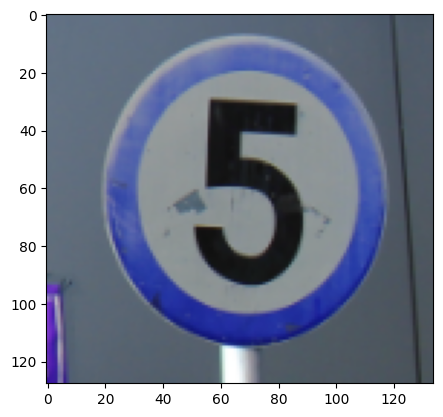

In [ ]:
img = cv2.imread('/content/traffic_Data/DATA/0/000_0001.png')
plt.imshow(img)

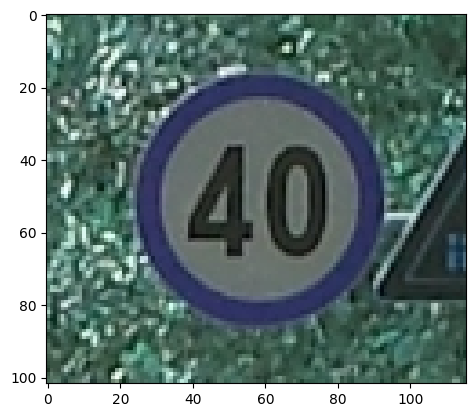

In [ ]:
img = cv2.imread('/content/traffic_Data/DATA/3/003_0005.png')
plt.imshow(img)

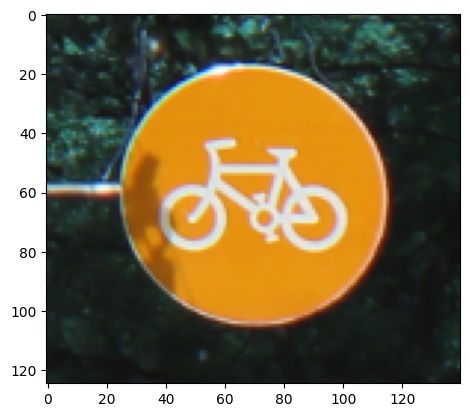

In [ ]:
img = cv2.imread('/content/traffic_Data/DATA/30/030_0001.png')
plt.imshow(img)

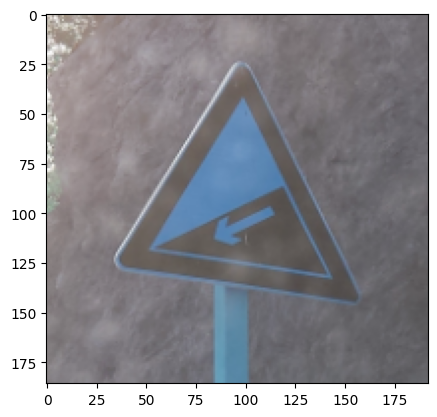

In [ ]:
img = cv2.imread('/content/traffic_Data/DATA/40/040_0001.png')
plt.imshow(img)

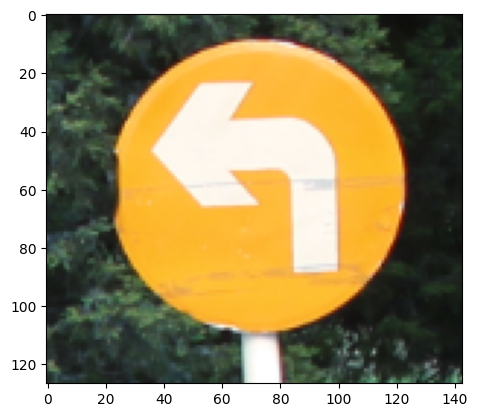

In [ ]:
img = cv2.imread('/content/traffic_Data/DATA/22/022_0005.png')
plt.imshow(img)

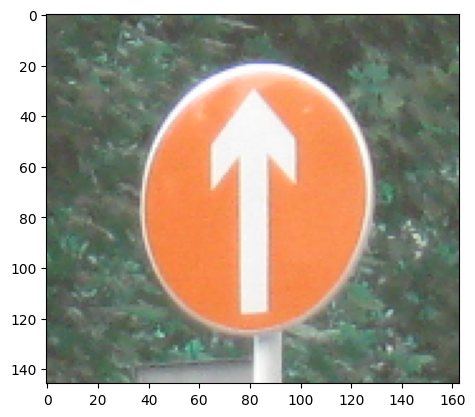

In [ ]:
img = cv2.imread('/content/traffic_Data/DATA/21/021_0001.png')
plt.imshow(img)

In [ ]:
label_df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
path = '/content/traffic_Data/DATA'
# for Keras to work on our dataset, it needs to be converted into a tf.data.Dataset type
# the below code generates a tf.data.Dataset from image files in a directory.
train_df = tf.keras.preprocessing.image_dataset_from_directory(path, validation_split=0.2,
                                                               subset='training',
                                                               image_size=(
                                                                   200, 200),
                                                               seed=123,
                                                               batch_size=32)
test_df = tf.keras.preprocessing.image_dataset_from_directory(path, validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(
                                                                 200, 200),
                                                             seed=123,
                                                             batch_size=32)


Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [ ]:
# Collecting a list of the class names
class_nums = train_df.class_names
class_names = []
for i in class_nums:
  class_names.append(label_df['Name'][int(i)])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_df), activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │       2,560,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 58)                  │           3,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,659,162 (10.14 MB)

 Trainable params: 2,659,162 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

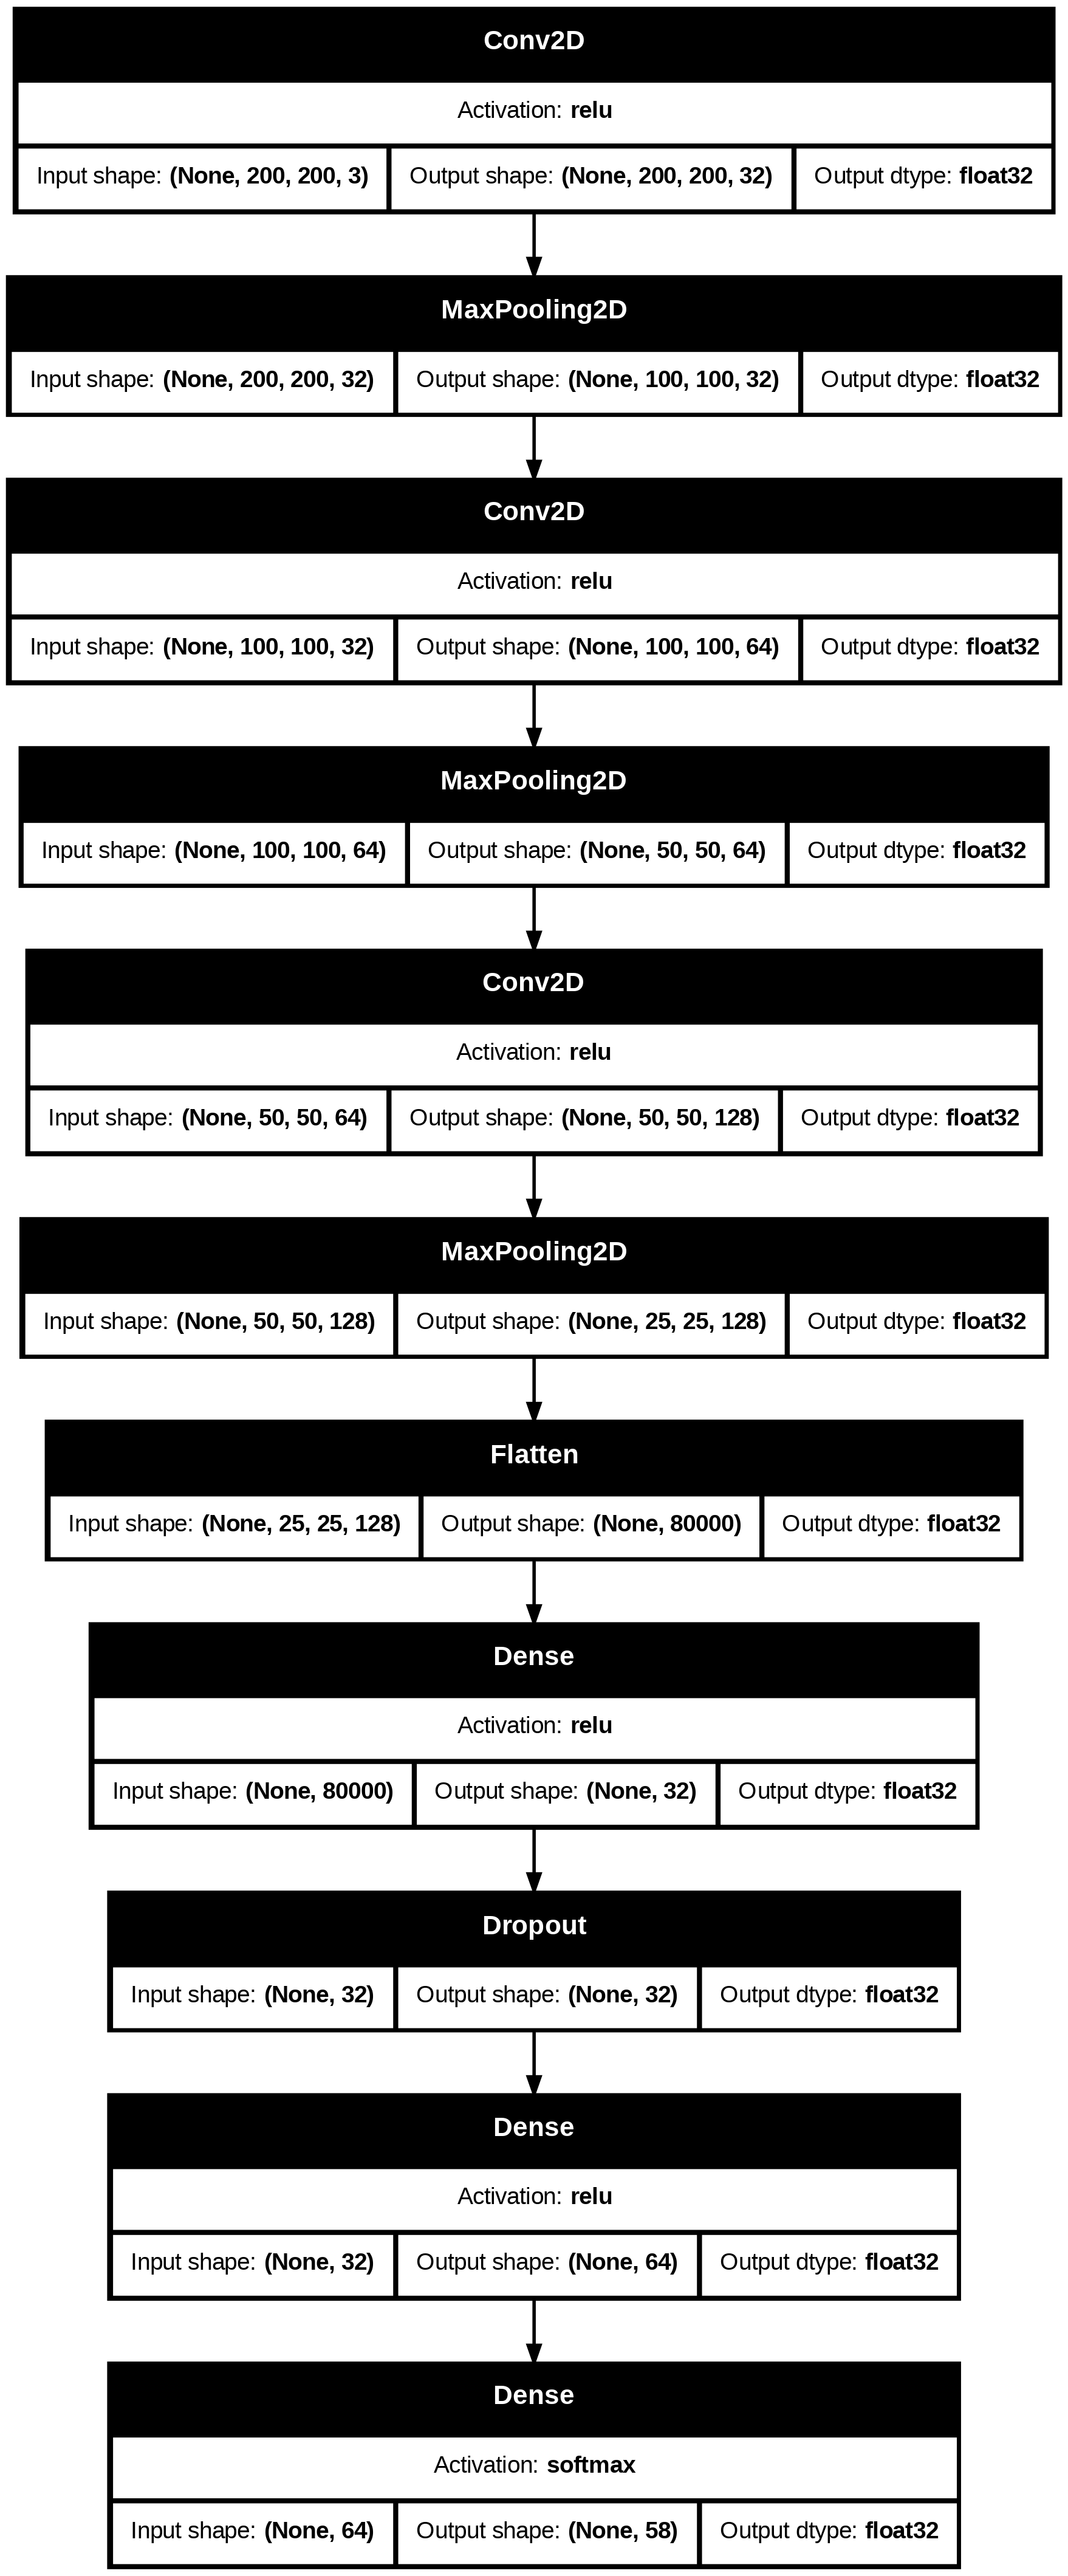

In [ ]:
# Visualizing the layers for training our model.
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_df, validation_data=test_df, epochs=50)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.0427 - loss: 18.8050 - val_accuracy: 0.0815 - val_loss: 3.9938
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.0704 - loss: 3.9720 - val_accuracy: 0.1067 - val_loss: 3.8988
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.0945 - loss: 3.8712 - val_accuracy: 0.1067 - val_loss: 3.7862
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 350s 3s/step - accuracy: 0.1030 - loss: 3.7643 - val_accuracy: 0.1067 - val_loss: 3.6901
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 351s 3s/step - accuracy: 0.1041 - loss: 3.6770 - val_accuracy: 0.1067 - val_loss: 3.6222
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.1026 - loss: 3.6228 - val_accuracy: 0.1067 - val_loss: 3.5800
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1061 - loss: 3.5875

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legened(['accuracy', 'val_accuracy'], loc='upper right')